<a href="https://colab.research.google.com/github/Cristinamulas/deep_learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Data Preprocessing

### Loading the dataset

In [ ]:
# loading tha dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


### Image normalization

In [ ]:
X_train = X_train / 255.0

In [ ]:
X_train.shape # h, w, color

(50000, 32, 32, 3)

In [ ]:
X_test = X_test / 255.0

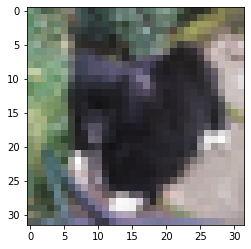

In [ ]:
plt.imshow(X_train[81])

## Building the CNN

### Defining the model

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding ='same', activation ='relu', input_shape =[32,32,3]))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding ='same', activation ='relu'))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides =2, padding='valid'))

In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
model.add(tf.keras.layers.Dense(128,'relu'))

In [ ]:
model.add(tf.keras.layers.Dense(10,'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,060,138
Trainable params: 1,060,138
Non-trainable params: 0
______________________________________________

### Compiling the model

In [ ]:
model.compile(loss ='sparse_categorical_crossentropy',optimizer='Adam', metrics= ['sparse_categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3551 - sparse_categorical_accuracy: 0.5154
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9638 - sparse_categorical_accuracy: 0.6589
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8113 - sparse_categorical_accuracy: 0.7153
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6932 - sparse_categorical_accuracy: 0.7574
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5787 - sparse_categorical_accuracy: 0.7956


### Evaluate the model

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9669 - sparse_categorical_accuracy: 0.6853
